# **Import** **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import ser
import lib_tree
import copy
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report, precision_score, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score1
import time
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# Loading Datasets

In [ ]:
Final_Data_S1= pd.read_csv("final_H358.csv")
Final_Data_S2= pd.read_csv("final_H355.csv")
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([  3.0,4.0])].index, 'labels']=2.0
Final_Data_S2.loc[Final_Data_S2[Final_Data_S2.labels.isin([  3.0,4.0])].index, 'labels']=2.0
ys = Final_Data_S1.labels
Xs= Final_Data_S1.drop(['Time', 'labels'], axis=1)
yt = Final_Data_S2.labels
Xt= Final_Data_S2.drop(['Time', 'labels'], axis=1)

In [ ]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(Xt, yt, test_size=0.85, stratify=yt,  random_state = 42)
X_train_t = X_train_t.to_numpy()
y_train_t= y_train_t.to_numpy()

clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(Xs, ys)
MAX = 3
target_names = ['Class 0', 'Class 1', 'Class 2']

In [ ]:
y_pred =  clf.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
f1_weighted = f1_score(y_pred, y_test_t, average='weighted')
print("accuracy:",accuracy_score(y_test_t, y_pred))
print('Weighted F1 score: ', f1_weighted)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix no TL:")
print(cm)

accuracy: 0.6255506607929515
Weighted F1 score:  0.6272355643144535
precision: [0.89048474 0.33333333 0.20402299]
recall; [0.75725191 0.0060241  0.81609195]
fscore: [0.81848185 0.01183432 0.32643678]
support: [655 166  87]
Confusion Matrix no TL:
[[496   0 159]
 [ 47   1 118]
 [ 14   2  71]]


Micro-averaged One-vs-Rest ROC AUC score:
0.7274
Macro-averaged One-vs-Rest ROC AUC score:
0.67


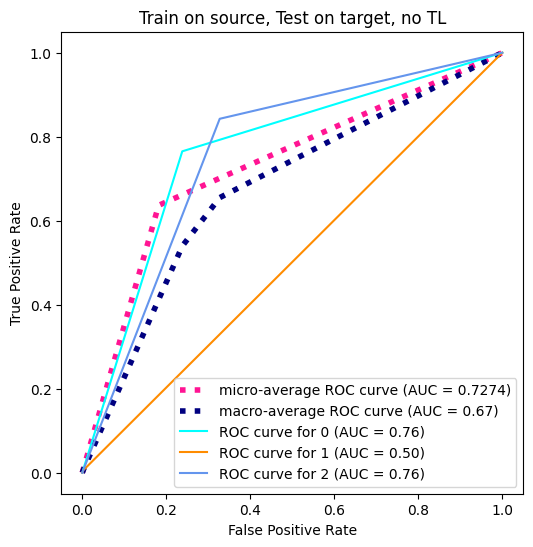

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
label_binarizer = LabelBinarizer().fit(y_test_t)
y_onehot_test = label_binarizer.transform(y_test_t)
y_onehot_test.shape  # (n_samples, n_classes)
label_binarizer.transform([0])

import matplotlib.pyplot as plt

y_pred_onehot = label_binarizer.transform(y_pred)



from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))


from sklearn.metrics import auc, roc_curve
n_classes = 3
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_pred_onehot.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.4f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)


for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_pred_onehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred_onehot[:, class_id],
        name=f"ROC curve for {class_id}",
        color=color,
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Train on source, Test on target, no TL")
plt.legend()
plt.show()

In [ ]:
model = DecisionTreeClassifier()
model = model.fit(X_train_t, y_train_t)
y_pred =  model.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
f1_weighted = f1_score(y_pred, y_test_t, average='weighted')

print("accuracy:",accuracy_score(y_test_t, y_pred))
print('Weighted F1 score: ', f1_weighted)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy: 0.8590308370044053
Weighted F1 score:  0.8676930803554302
precision: [0.90921986 0.688      0.67948718]
recall; [0.97416413 0.52760736 0.6091954 ]
fscore: [0.94057227 0.59722222 0.64242424]
support: [658 163  87]
Confusion Matrix:
[[641  14   3]
 [ 55  86  22]
 [  9  25  53]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Micro-averaged One-vs-Rest ROC AUC score:
0.8844
Macro-averaged One-vs-Rest ROC AUC score:
0.8276


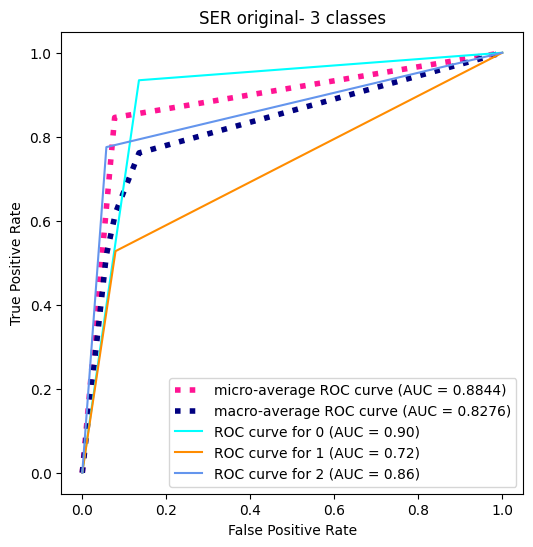

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
label_binarizer = LabelBinarizer().fit(y_test_t)
y_onehot_test = label_binarizer.transform(y_test_t)
y_onehot_test.shape  # (n_samples, n_classes)
label_binarizer.transform([0])

import matplotlib.pyplot as plt

y_pred_onehot = label_binarizer.transform(y_pred)



from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))


from sklearn.metrics import auc, roc_curve
n_classes = 3
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_pred_onehot.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.4f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)


for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_pred_onehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.4f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.4f}")
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred_onehot[:, class_id],
        name=f"ROC curve for {class_id}",
        color=color,
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SER original- 3 classes")
plt.legend()
plt.show()

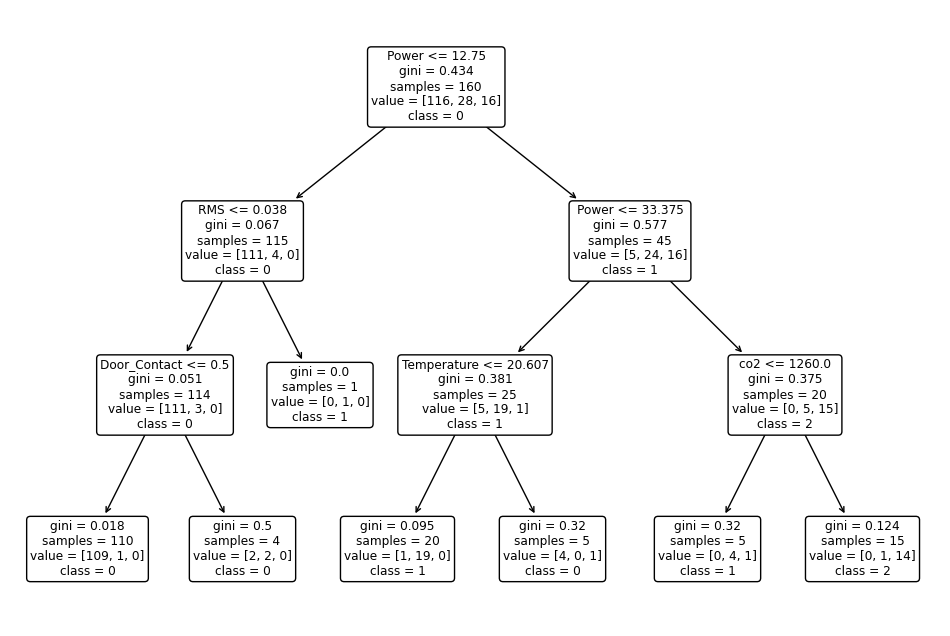

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=['0','1', '2'], rounded=True)
plt.show()

## **Transfer Learning**

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(Xs, ys)

(0, False)

# SMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X_train_t, y_train_t)


In [ ]:
SER_smote = copy.deepcopy(clf)
ser.SER(0, SER_smote, X_resampled, y_resampled, original_ser=True)
#print('ser naive random over-sampling accuracy:', SER_oversampled.score(X_resampled, y_resampled))
y_pred = SER_smote.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
print("accuracy:",accuracy_score(y_test_t, y_pred))
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix ser smote:")
print(cm)

precision: [0.94856278 0.68361582 0.75714286]
recall; [0.95579268 0.74233129 0.59550562]
fscore: [0.95216401 0.71176471 0.66666667]
support: [656 163  89]
accuracy: 0.8821585903083701
Confusion Matrix ser smote:
[[627  29   0]
 [ 25 121  17]
 [  9  27  53]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


precision: [0.9625585  0.66666667 0.81818182]
recall; [0.94054878 0.82208589 0.60674157]
fscore: [0.95142637 0.73626374 0.69677419]
support: [656 163  89]
accuracy: 0.8865638766519823
Confusion Matrix ser smote:
[[617  39   0]
 [ 17 134  12]
 [  7  28  54]]


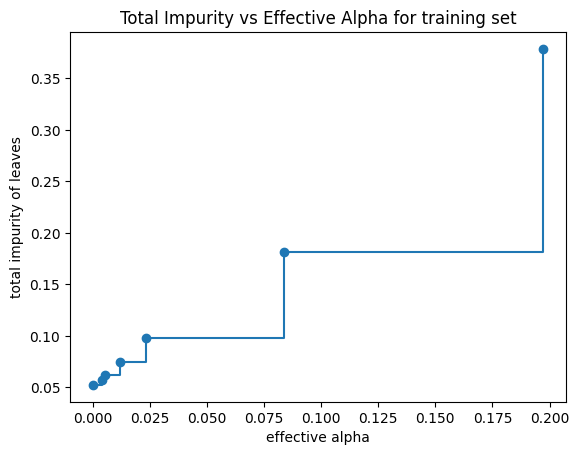

In [ ]:

# Assuming you have already defined dt_new and X_train_res, y_train_res

# Path for cost complexity pruning
path = SER_smote.cost_complexity_pruning_path( X_resampled, y_resampled)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the pruning path
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")

# Find the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

# Create a new DecisionTreeClassifier with ccp_alpha parameter set
SER_smote = DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha, max_depth =3)

# Re-fit the tree
SER_smote.fit( X_resampled, y_resampled)

y_pred = SER_smote.predict(X_test_t)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
print("accuracy:",accuracy_score(y_test_t, y_pred))
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix ser smote:")
print(cm)

In [ ]:
f1_weighted = f1_score(y_pred, y_test_t, average='weighted')
print('weighted f1 score:', f1_weighted)

weighted f1 score: 0.8708134172143515


Micro-averaged One-vs-Rest ROC AUC score:
0.9034
Macro-averaged One-vs-Rest ROC AUC score:
0.8448


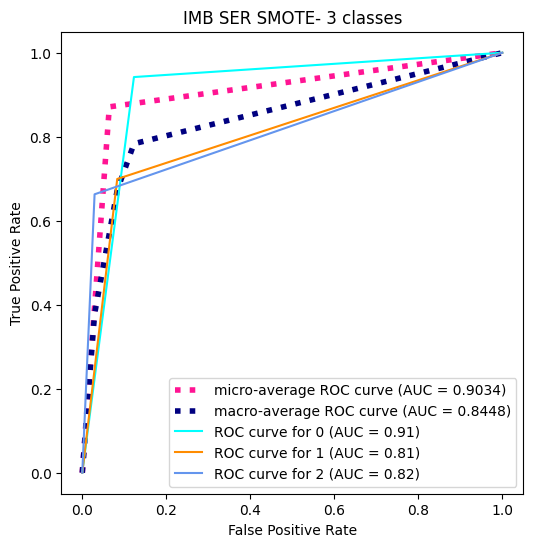

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
label_binarizer = LabelBinarizer().fit(y_test_t)
y_onehot_test = label_binarizer.transform(y_test_t)
y_onehot_test.shape  # (n_samples, n_classes)
label_binarizer.transform([0])

import matplotlib.pyplot as plt

y_pred_onehot = label_binarizer.transform(y_pred)



from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))


from sklearn.metrics import auc, roc_curve
n_classes = 3
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_pred_onehot.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.4f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)


for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_pred_onehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.4f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.4f}")
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred_onehot[:, class_id],
        name=f"ROC curve for {class_id}",
        color=color,
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("IMB SER SMOTE- 3 classes")
plt.legend()
plt.show()

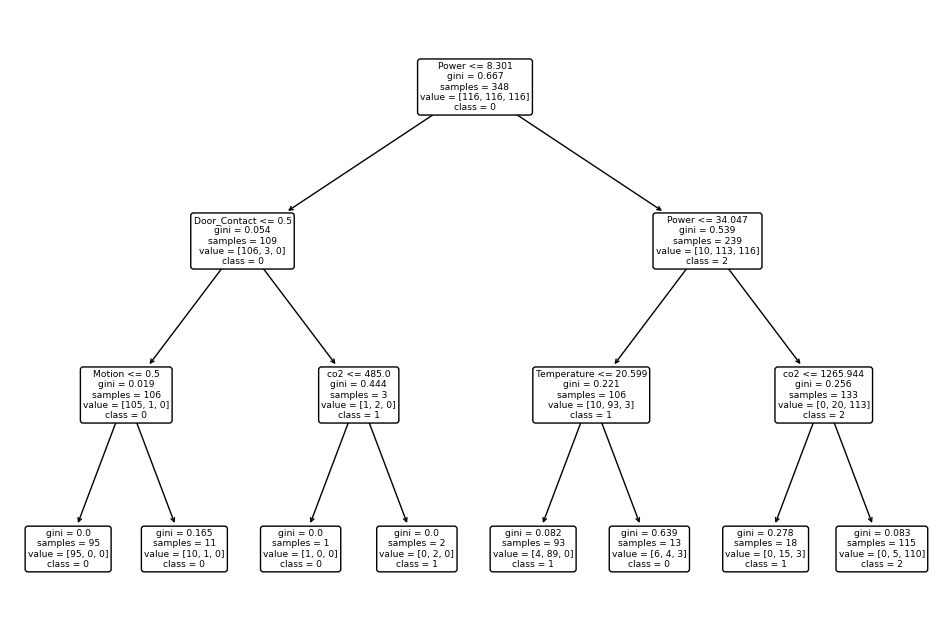

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(SER_smote, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=['0','1','2'], rounded=True)
plt.show()

## UNDERSAMPLING

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42, sampling_strategy='not majority'
)
X_res, y_res = cc.fit_resample(X_train_t, y_train_t)
SER_cluster = copy.deepcopy(clf)
ser.SERRR(0, SER_cluster, X_res, y_res, original_ser=True)
#print('ser naive random over-sampling accuracy:', SER_oversampled.score(X_resampled, y_resampled))
y_pred = SER_cluster.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
print("accuracy:",accuracy_score(y_test_t, y_pred))
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix ser smote:")
print(cm)

precision: [0.88520055 0.64646465 0.61627907]
recall; [0.97560976 0.39263804 0.59550562]
fscore: [0.92820885 0.48854962 0.60571429]
support: [656 163  89]
accuracy: 0.8337004405286343
Confusion Matrix ser smote:
[[640  15   1]
 [ 67  64  32]
 [ 16  20  53]]


In [ ]:
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42, sampling_strategy='not majority'
)
X_res, y_res = cc.fit_resample(X_train_t, y_train_t)
SER_cluster = copy.deepcopy(clf)
ser.SERRR(0, SER_cluster, X_res, y_res, original_ser=True)
#print('ser naive random over-sampling accuracy:', SER_oversampled.score(X_resampled, y_resampled))
y_pred = SER_cluster.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
print("accuracy:",accuracy_score(y_test_t, y_pred))
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix ser smote:")
print(cm)

precision: [0.91606368 0.65178571 0.54285714]
recall; [0.96493902 0.44785276 0.64044944]
fscore: [0.93986637 0.53090909 0.58762887]
support: [656 163  89]
accuracy: 0.8403083700440529
Confusion Matrix ser smote:
[[633  16   7]
 [ 49  73  41]
 [  9  23  57]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


accuracy: 0.8799559471365639
precision: [0.9491018  0.67058824 0.72857143]
recall; [0.96646341 0.6993865  0.57303371]
fscore: [0.95770393 0.68468468 0.64150943]
support: [656 163  89]
Confusion Matrix imb ser ClusterCentroids:
[[634  22   0]
 [ 30 114  19]
 [  4  34  51]]


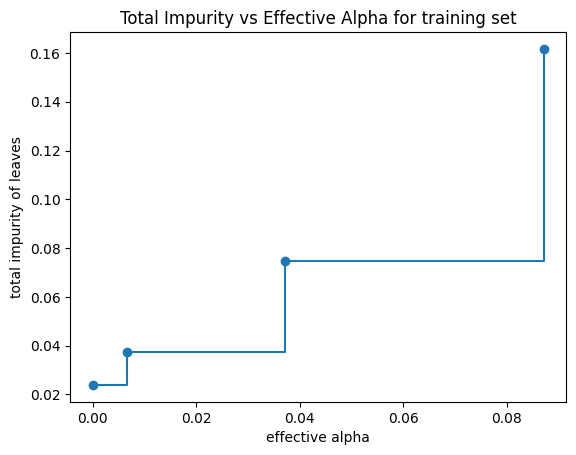

In [ ]:
# Assuming you have already defined dt_new and X_train_res, y_train_res

# Path for cost complexity pruning
path = SER_cluster.cost_complexity_pruning_path(X_res, y_res)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the pruning path
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")

# Find the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

# Create a new DecisionTreeClassifier with ccp_alpha parameter set
SER_cluster = DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha, max_depth = 3)

# Re-fit the tree
SER_cluster.fit(X_res, y_res)

y_pred = SER_cluster.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)

print("accuracy:",accuracy_score(y_test_t, y_pred))
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix imb ser ClusterCentroids:")
print(cm)

In [ ]:
f1_weighted = f1_score(y_pred, y_test_t, average='weighted')
print('weighted f1 score:', f1_weighted)

weighted f1 score: 0.8822117624875656


Micro-averaged One-vs-Rest ROC AUC score:
0.9100
Macro-averaged One-vs-Rest ROC AUC score:
0.8343


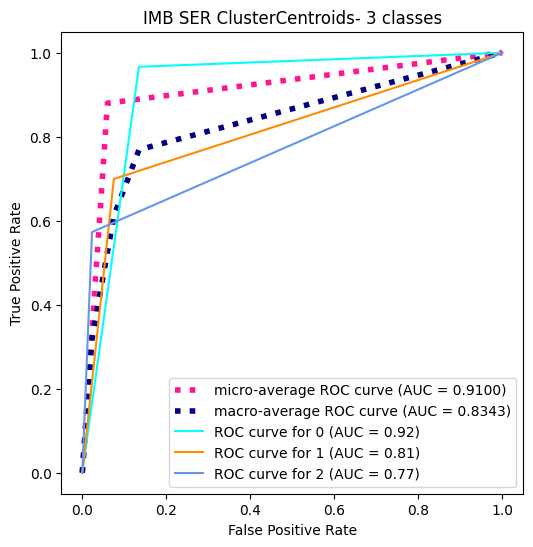

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
label_binarizer = LabelBinarizer().fit(y_test_t)
y_onehot_test = label_binarizer.transform(y_test_t)
y_onehot_test.shape  # (n_samples, n_classes)
label_binarizer.transform([0])

import matplotlib.pyplot as plt

y_pred_onehot = label_binarizer.transform(y_pred)



from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))


from sklearn.metrics import auc, roc_curve
n_classes = 3
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_pred_onehot.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.4f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)


for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_pred_onehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.4f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.4f}")
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred_onehot[:, class_id],
        name=f"ROC curve for {class_id}",
        color=color,
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("IMB SER ClusterCentroids- 3 classes")
plt.legend()
plt.show()

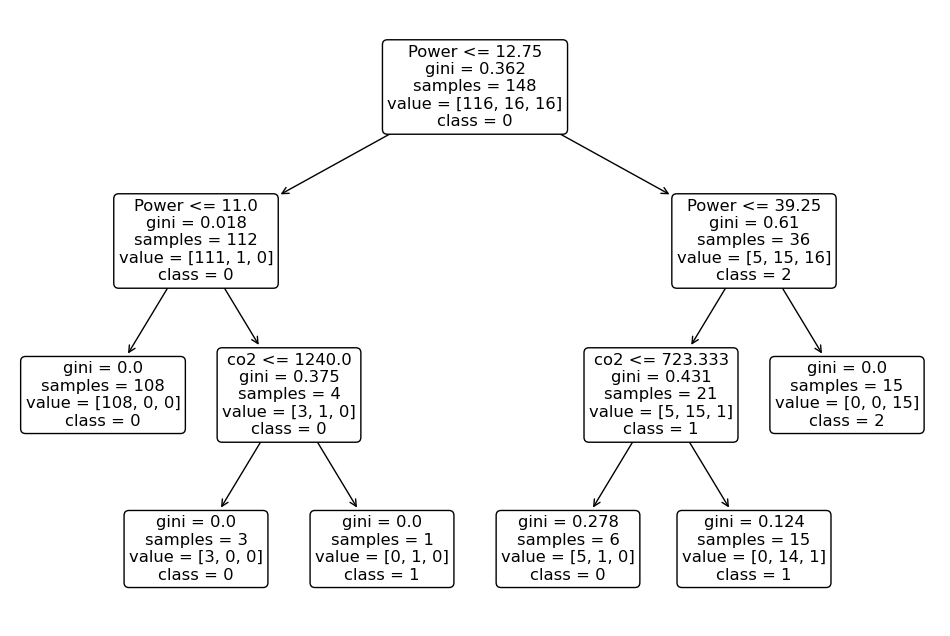

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(SER_cluster, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=['0','1','2'], rounded=True)
plt.show()

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train_t, y_train_t)

SER_tomek = copy.deepcopy(clf)
ser.SER(0, SER_tomek, X_res, y_res, original_ser=True)
#print('ser naive random over-sampling accuracy:', SER_oversampled.score(X_resampled, y_resampled))
y_pred = SER_tomek.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
print("accuracy:",accuracy_score(y_test_t, y_pred))
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix imb ser smotetomek:")
print(cm)


precision: [0.9675425  0.67539267 0.75714286]
recall; [0.95426829 0.79141104 0.59550562]
fscore: [0.96085955 0.72881356 0.66666667]
support: [656 163  89]
accuracy: 0.8898678414096917
Confusion Matrix imb ser smotetomek:
[[626  30   0]
 [ 17 129  17]
 [  4  32  53]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


precision: [0.97607656 0.64563107 0.76      ]
recall; [0.93292683 0.81595092 0.64044944]
fscore: [0.95401403 0.72086721 0.69512195]
support: [656 163  89]
accuracy: 0.8832599118942731
Confusion Matrix ser smotetomek:
[[612  44   0]
 [ 12 133  18]
 [  3  29  57]]


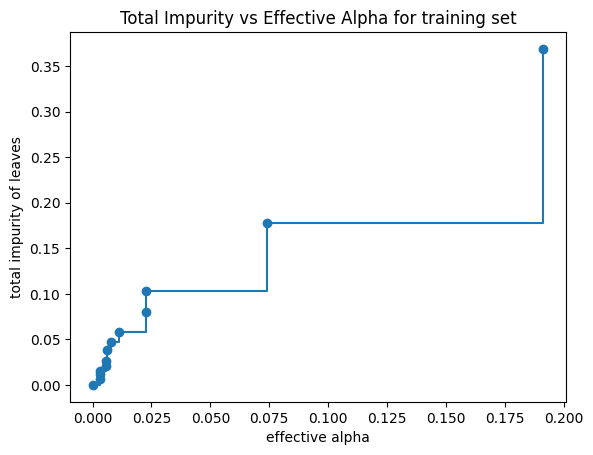

In [ ]:
# Assuming you have already defined dt_new and X_train_res, y_train_res

# Path for cost complexity pruning
path = SER_tomek.cost_complexity_pruning_path(X_res, y_res)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the pruning path
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")

# Find the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

# Create a new DecisionTreeClassifier with ccp_alpha parameter set
SER_tomekk = DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha, max_depth=3)

# Re-fit the tree
SER_tomekk.fit(X_res, y_res)

y_pred = SER_tomekk.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
print("accuracy:",accuracy_score(y_test_t, y_pred))
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix ser smotetomek:")
print(cm)

In [ ]:
f1_weighted = f1_score(y_pred, y_test_t, average='weighted')
print('weighted f1 score:', f1_weighted)

weighted f1 score: 0.8797352289630518


Micro-averaged One-vs-Rest ROC AUC score:
0.9124
Macro-averaged One-vs-Rest ROC AUC score:
0.8683


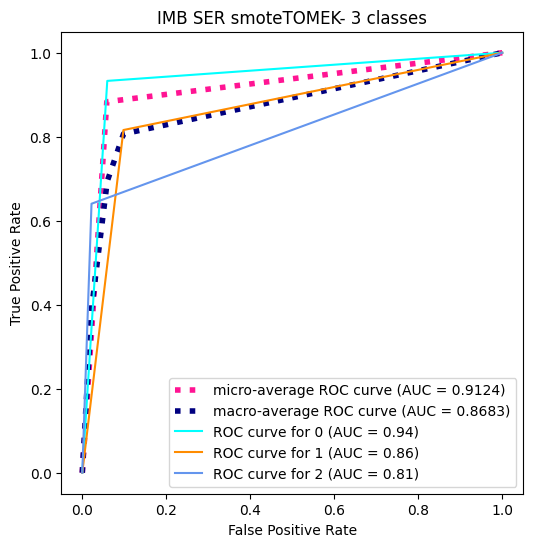

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
label_binarizer = LabelBinarizer().fit(y_test_t)
y_onehot_test = label_binarizer.transform(y_test_t)
y_onehot_test.shape  # (n_samples, n_classes)
label_binarizer.transform([0])

import matplotlib.pyplot as plt

y_pred_onehot = label_binarizer.transform(y_pred)



from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))


from sklearn.metrics import auc, roc_curve
n_classes = 3
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_pred_onehot.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.4f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)


for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_pred_onehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.4f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.4f}")
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred_onehot[:, class_id],
        name=f"ROC curve for {class_id}",
        color=color,
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("IMB SER smoteTOMEK- 3 classes")
plt.legend()
plt.show()

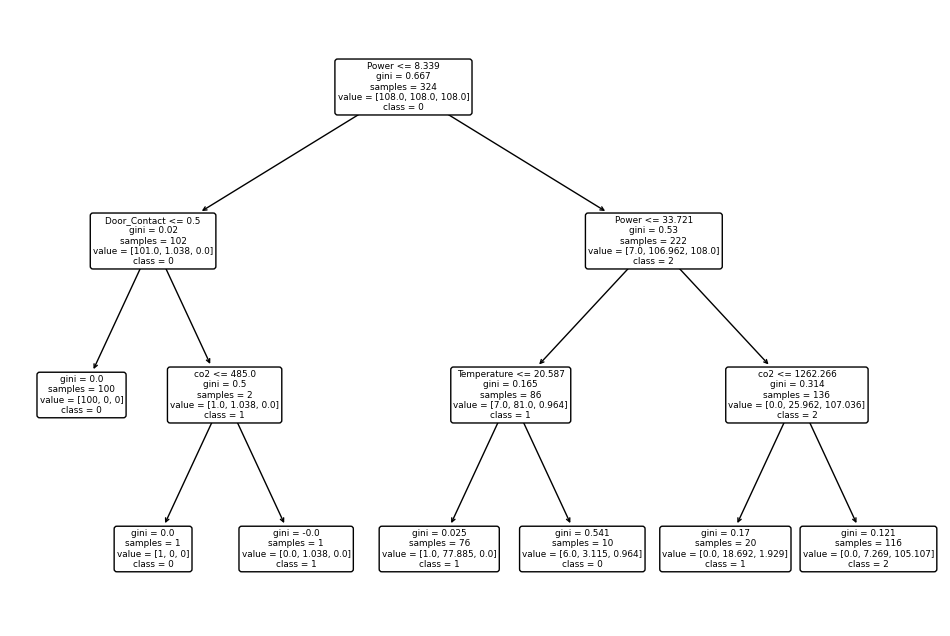

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(SER_tomekk, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=['0','1','2'], rounded=True)
plt.show()